<a href="https://colab.research.google.com/github/blazingfire03/PROJECTS-2020/blob/main/neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Creating data to view and fit 

In [23]:
from sklearn.datasets import make_circles


x,y = make_circles(1000,noise=0.03,random_state=42)



In [24]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [25]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [26]:
import pandas as pd

circles = pd.DataFrame({"x0" : x[:,0],"x1":x[:,1],"label" : y})

circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


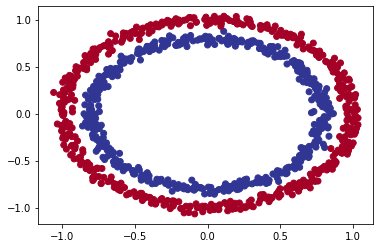

In [27]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)


#### Input and Output shapes

In [28]:
x.shape , y.shape

((1000, 2), (1000,))

In [29]:
len(x),len(y)

(1000, 1000)

In [30]:
x[0],y[0]

(array([0.75424625, 0.23148074]), 1)

### Modelling

In [31]:
import tensorflow as tf

In [32]:
tf.random.set_seed(42)
model_1  = tf.keras.Sequential([

    tf.keras.layers.Dense(1)
])


model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
optimizer = tf.keras.optimizers.SGD(),
metrics = ["accuracy"])


model_1.fit(x,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4820


In [33]:
model_1.fit(x,y,epochs=200,verbose=0)
model_1.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [34]:
# Model 2

model2 = tf.keras.Sequential([

    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])


model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
optimizer = tf.keras.optimizers.SGD(),
metrics =["accuracy"] )


model2.fit(x,y,epochs=100,verbose=0)

In [35]:
model2.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934733390808105, 0.5]

In [36]:
# Model 3

model3 = tf.keras.Sequential([

    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])


model3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
optimizer = tf.keras.optimizers.Adam(),
metrics = ["accuracy"])

model3.fit(x,y,epochs=100,verbose=0)

In [37]:
model3.evaluate(x,y)

32/32 [==============================] - 1s 5ms/step - loss: 0.6991 - accuracy: 0.5140


[0.6991010308265686, 0.5139999985694885]

In [38]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


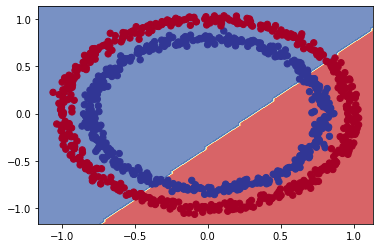

In [39]:
plot_decision_boundary(model3, x, y)

#### The missing piece :  Non Linearity

In [40]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([

    tf.keras.layers.Dense(1,activation ="linear")
])

model_4.compile(loss = "binary_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics= ["accuracy"])


history = model_4.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


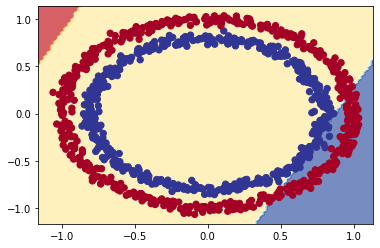

In [41]:
plot_decision_boundary(model_4,x,y)

In [42]:
tf.random.set_seed(42)


model_5 = tf.keras.Sequential([

    tf.keras.layers.Dense(1,activation="relu")
])


model_5.compile(loss = "binary_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics =["accuracy"])


history = model_5.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


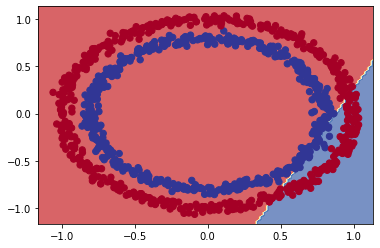

In [43]:
plot_decision_boundary(model_5,x,y)

In [44]:
tf.random.set_seed(42)


model_6 = tf.keras.Sequential([

    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1) # Output Layer
])


model_6.compile(loss = "binary_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics = ["accuracy"])


history = model_6.fit(x,y,epochs=250,verbose=0)

In [45]:
model_6.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


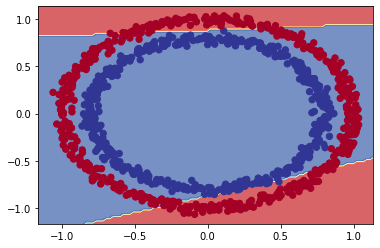

In [46]:
plot_decision_boundary(model_6,x,y)

In [47]:
tf.random.set_seed(42)


model_7 = tf.keras.Sequential([

    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])


model_7.compile(loss = "binary_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics = ["accuracy"])

history = model_7.fit(x,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


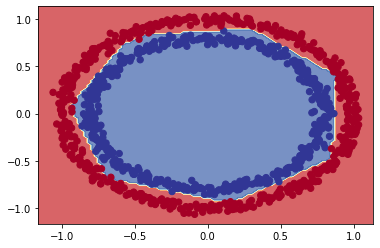

In [48]:
plot_decision_boundary(model_7,x,y)

#### Evaluating and improving our classification

In [49]:
len(x)

1000

In [50]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [51]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [52]:
# recreating a model to fit on the training data and to evaluate on test data

tf.random.set_seed(42)


model_8 = tf.keras.Sequential([

    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])



model_8.compile(loss ="binary_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics = ["accuracy"])


history = model_8.fit(x_train,y_train,epochs=250)

Epoch 1/250
25/25 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.5050
Epoch 2/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5163
Epoch 3/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5325
Epoch 4/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5288
Epoch 5/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5288
Epoch 6/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5325
Epoch 7/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5350
Epoch 8/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5362
Epoch 9/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5350
Epoch 10/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5312
Epoch 11/

In [53]:
model_8.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 1.0000


[0.049623169004917145, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


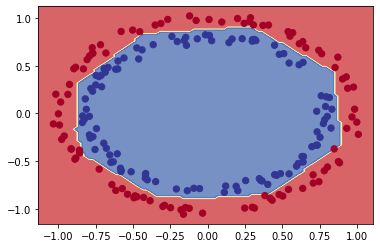

In [54]:
plot_decision_boundary(model_8,x_test,y_test)

##### Plotting loss curves

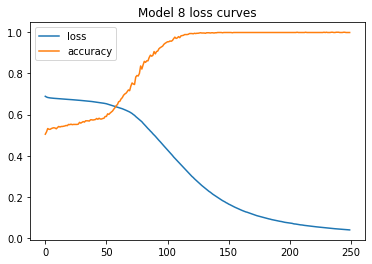

In [55]:
pd.DataFrame(history.history).plot()
plt.title("Model 8 loss curves");

#### Finding the best learning rate

In [56]:
tf.random.set_seed(42)


model_9 = tf.keras.Sequential([

    tf.keras.layers.Dense(4,activation ="relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])


model_9.compile(loss = "binary_crossentropy",
optimizer = "Adam",
metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch :1e-4 *  10**(epoch/20))


history = model_9.fit(x_train,y_train,epochs=100,callbacks=lr_scheduler)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5063 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5088 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5125 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5125 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5075 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5113 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

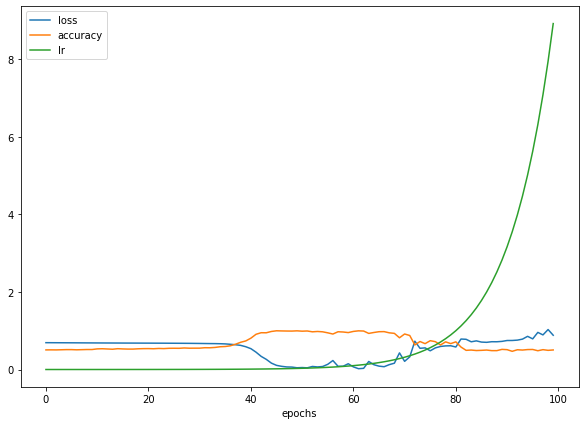

In [57]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="epochs");

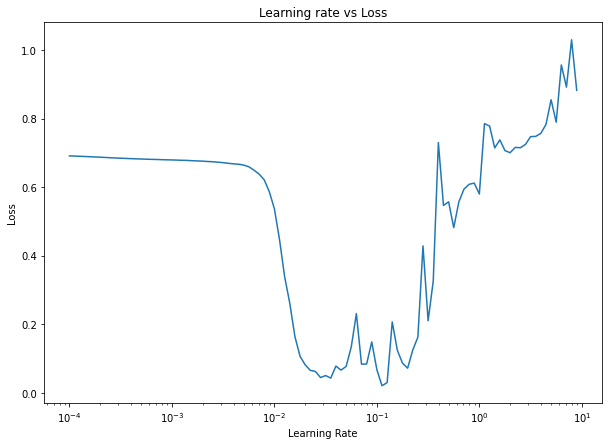

In [58]:
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss");

#### Confusion matrix

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
y_preds = model_9.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [61]:
y_preds

array([[0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.42632475],
       [0.426

In [62]:
confusion_matrix(y_test,y_preds)

ValueError: ignored

The predictions are in the form of **prediction probability**. Round the probability predictions to either 0 or 1

In [ ]:
tf.round(y_preds)[:10]

In [ ]:
confusion_matrix(y_test,tf.round(y_preds))

### Working with a larger example

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

In [ ]:
# Show first training sample

train_data[0]

In [ ]:
# Show training labels

train_labels

In [ ]:
#Check the shape of single example

train_data[0].shape,train_labels[0].shape

In [ ]:
# Plot a single sample
plt.imshow(train_data[9])

In [ ]:
train_labels[9]

In [ ]:
# Create a small list so we can index our training labels in human readable format

class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
index_of_choice =2002
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

In [ ]:
# Plot mutiple random images of fashion MNIST

import random
plt.figure(figsize=(10,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_labels)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)



In [ ]:
# Building a multiclass classification model

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
    
])

model.compile(loss = "sparse_categorical_crossentropy",
optimizer = tf.keras.optimizers.Adam(),
metrics =["accuracy"])

non_norm_history = model.fit(
    train_data,train_labels,epochs=10,validation_data = (test_data,test_labels)
)

In [ ]:
model.summary()

In [ ]:
# Normalizing our data
train_data.min(),train_data.max()

In [ ]:
train_data_norm = train_data/255
test_data_norm = test_data/255

In [ ]:
train_data_norm.min(),train_data_norm.max()

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])



model_11.compile(loss = "sparse_categorical_crossentropy",
optimizer = "Adam",
metrics=["accuracy"])


norm_history = model_11.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

In [ ]:
pd.DataFrame(non_norm_history.history).plot(title="Non Normalized Data")

pd.DataFrame(norm_history.history).plot(title="Normalized Data")

In [ ]:
# Finding ideal learning rate
from tensorflow.keras.callbacks import LearningRateScheduler

tf.random.set_seed(42)

model_12 = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])


model_12.compile(loss = "sparse_categorical_crossentropy",
optimizer = "Adam",
metrics = ["accuracy"])


lr_scheduler = LearningRateScheduler(lambda epoch : 1e-3 * 10**(epoch/20))


history_12 = model_12.fit(train_data_norm,train_labels,epochs=40,validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler])



In [ ]:
#Plotting loss curve


# pd.DataFrame(history_12.history).plot();

lrs =1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs,history_12.history["loss"])
plt.title("Leraning Rate")

In [ ]:
10**-3

In [ ]:
# Refitting the model with ideal learning rate

tf.random.set_seed(42)

model_13 = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_13.compile(loss = "sparse_categorical_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics = ["accuracy"])


history_13 = model_13.fit(train_data_norm,train_labels,validation_data=(test_data_norm,test_labels),epochs=20)

#### Evaluate a model

In [ ]:
test_labels

In [ ]:
y_probs = model_13.predict(test_data_norm)

In [ ]:
y_probs

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (15, 15)

# Create the confusion matrix
cm = confusion_matrix(test_labels, y_probs.argmax(axis=1))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = class_names

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=10)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):

  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  
  pred_probs = model.predict(target_image.reshape(1,28,28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

In [ ]:
plot_random_image(model=model_13, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

In [ ]:
test_data[0].reshape(1,28,28)